#Borrower defaulted classification
classification is one of important algorithm of Supervise learning to know
This practice we are goingto walkthrough the classification with Decission Tree.
step by step we will dealwith imbalanced case, create the tree, measure then feature importance step and why it need it, so let's get start.

import lib and data

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
path = "/content/drive/MyDrive/lone/lendingclub.csv"

In [3]:
data = pd.read_csv(path)

In [4]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,y
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  y                  9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
obs = data.shape[0]
types = data.dtypes
counts = data.apply(lambda x: x.count())
uniques = data.apply(lambda x: [x.unique()]).transpose()
nulls = data.apply(lambda x: x.isnull().sum())
distincts = data.apply(lambda x: x.unique().shape[0])
missing_ration = (data.isnull().sum()/ obs) * 100
skewness = data.skew()
kurtosis = data.kurt() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == '__main__':


In [7]:
corr = data.corr()['y']
corr_col = 'corr '  + 'MSRP'
str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
str.columns = cols
str.sort_values(by ='corr MSRP', ascending=False)

,types,counts,distincts,nulls,missing_ration,uniques,skewness,kurtosis,corr MSRP
y,int64,9578,2,0,0.0,"[0, 1]",1.854592,1.439811,1.000000
int.rate,float64,9578,249,0,0.0,"[0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.078...",0.164420,-0.224324,0.159552
inq.last.6mths,int64,9578,28,0,0.0,"[0, 1, 2, 3, 4, 5, 6, 8, 7, 33, 9, 18, 14, 15,...",3.584151,26.288131,0.149452
revol.util,float64,9578,1035,0,0.0,"[52.1, 76.7, 25.6, 73.2, 39.5, 51.0, 76.8, 68....",0.059985,-1.116467,0.082088
revol.bal,int64,9578,7869,0,0.0,"[28854, 33623, 3511, 33667, 4740, 50807, 3839,...",11.161058,259.655203,0.053699
installment,float64,9578,4788,0,0.0,"[829.1, 228.22, 366.86, 162.34, 102.92, 125.13...",0.912522,0.137908,0.049955
pub.rec,int64,9578,6,0,0.0,"[0, 1, 2, 3, 4, 5]",5.126434,38.781007,0.048634
dti,float64,9578,2529,0,0.0,"[19.48, 14.29, 11.63, 8.1, 14.97, 16.98, 4.0, ...",0.023941,-0.900355,0.037362
delinq.2yrs,int64,9578,11,0,0.0,"[0, 1, 2, 4, 3, 5, 6, 13, 7, 8, 11]",6.061793,71.433182,0.008881
days.with.cr.line,float64,9578,2687,0,0.0,"[5639.958333, 2760.0, 4710.0, 2699.958333, 406...",1.155748,1.937861,-0.029237


Input variables

- **credit.policy** (categorical: 1 if the borrower meets the credit underwriting criteria of LendingClub.com, and 0 otherwise)
- **purpose**: what is the loan purpose? (categorical: “credit_card”, “debt_consolidation”, “educational”, “major_purchase”, “small_business”, and “all_other”)
- **int.rate**: the loan interest rate, as a proportion (a rate of 11% would be stored as 0.11)(numeric). Important note: borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
- **installment**: the monthly installments owed by the borrower if the loan is funded (numeric)
- **log.annual.inc**: the natural log of the self-reported annual income of the borrower (numeric)
- **dti**: the debt-to-income ratio of the borrower (amount of debt divided by annual income) (numeric)
- **fico**: the FICO credit score of the borrower (numeric)
- **days.with.cr.line**: the number of days the borrower has had a credit line (numeric)
- **revol.bal**: the borrower’s revolving balance (amount unpaid at the end of the credit card billing cycle) (numeric)
- **revol.util**: the borrower’s revolving line utilization rate (the amount of the credit line used relative to total credit available) (numeric)
- **inq.last.6mths**: the borrower’s number of inquiries by creditors in the last 6 months (numeric)
- **delinq.2yrs**: the number of times the borrower had been 30+ days past due on a payment in the past 2 years (numeric)
- **pub.rec**: the borrower’s number of derogatory public records (bankruptcy filings, tax liens, or judgments) (numeric)

##EDA

In [8]:
uniq = data['purpose'].unique()

In [9]:
print(uniq)

['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']


purpose: the column to represent the propose of lone.
compote New feature to know how many percentage in each purpose

In [10]:
a = len(data[data['purpose']=='debt_consolidation'])
b = len(data[data['purpose']=='credit_card'])
c = len(data[data['purpose']=='home_improvement'])
d = len(data[data['purpose']=='small_business'])
e = len(data[data['purpose']=='major_purchase'])
f = len(data[data['purpose']=='educational'])
g = len(data[data['purpose']=='all_other'])
h = len(data['purpose'])
import pandas as pd
 
# initialize list of lists
data1 = [ ['debt_consolidation', a, a/h], ['credit_card', b, b/h], ['home_improvement', c, c/h],
          ['small_business', d, d/h], ['major_purchase', e, e/h], ['educational', f, f/h],
          ['all_other', g ,g/h]]
 
# Create the pandas DataFrame

Loan_Purpose = pd.DataFrame(data1, columns = ['Loan Purpose', 'Count', 'Percentage'])
 
# print dataframe.
Loan_Purpose

,Loan Purpose,Count,Percentage
0,debt_consolidation,3957,0.413134
1,credit_card,1262,0.131760
2,home_improvement,629,0.065671
3,small_business,619,0.064627
4,major_purchase,437,0.045625
5,educational,343,0.035811
6,all_other,2331,0.243370


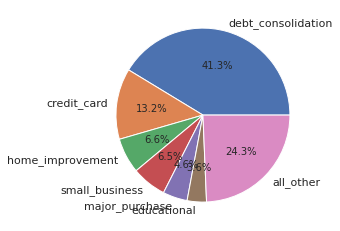

In [11]:
plt.pie(Loan_Purpose['Count'], labels = Loan_Purpose['Loan Purpose'],autopct='%.1f%%')
plt.show()

1.Target check

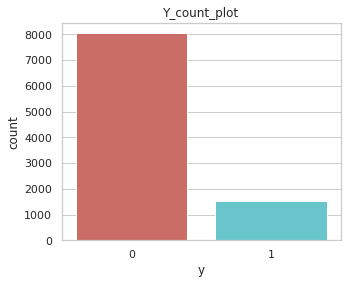

In [12]:
#Imbalance check

plt.figure(figsize = (5,4))
sns.countplot(x='y', data=data, palette='hls')

plt.title("Y_count_plot")
plt.show()


In [13]:
len_0 = len(data[data['y']==0])
len_1 = len(data[data['y']==1])
len_y = len(data['y'])

print('percent-0 :' ,len_0/len_y*100, "%")
print('percent-1 :' ,len_1/len_y*100, "%")

percent-0 : 83.99457089162664 %
percent-1 : 16.005429108373356 %


BAM! we got **imbalance** case and have to dealwith it

In [14]:
data.groupby('y').mean()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
y,,,,,,,,,,,,
0,0.832318,0.120770,314.574123,10.941091,12.494413,713.326911,4592.632624,16122.724425,45.759608,1.433934,0.161591,0.056557
1,0.661448,0.132452,342.785114,10.885023,13.195838,697.828441,4393.541259,21066.293542,52.255075,2.330724,0.174821,0.091324


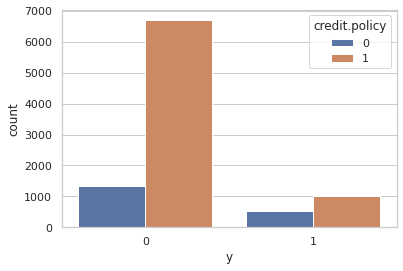

In [15]:
sns.countplot(data=data, x='y', hue='credit.policy')

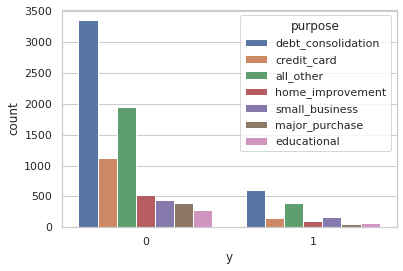

In [16]:
sns.countplot(data=data, x='y', hue='purpose')

In [17]:
data.groupby('purpose')['y'].value_counts().unstack()

y,0,1
purpose,,
all_other,1944,387
credit_card,1116,146
debt_consolidation,3354,603
educational,274,69
home_improvement,522,107
major_purchase,388,49
small_business,447,172


credit.policy got high corr with target and the graph prove that

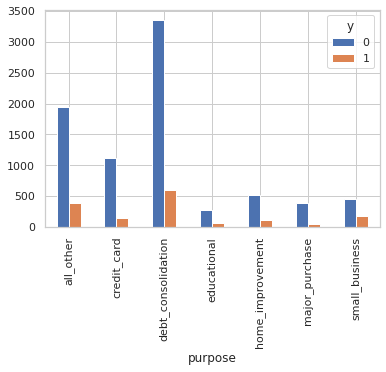

In [18]:
data.groupby('purpose')['y'].value_counts().unstack().plot.bar()

2.X check

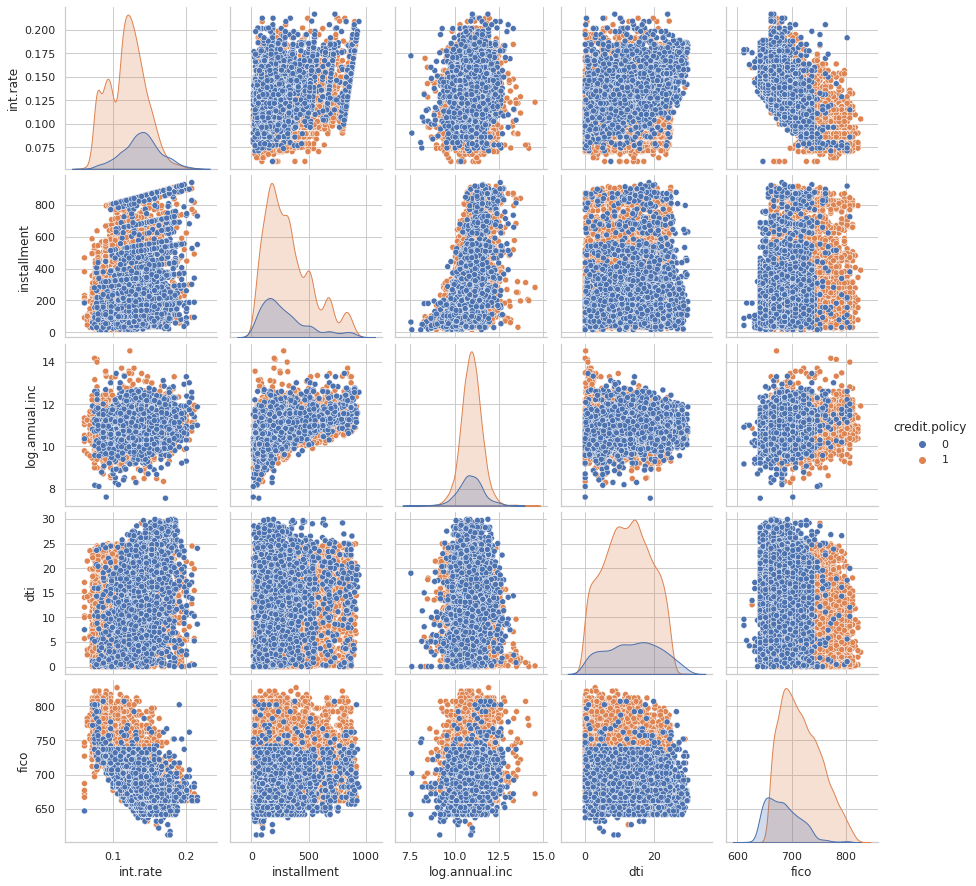

In [19]:
sns.pairplot(data.iloc[:, :7], hue='credit.policy')

one hot endcoding - deal with category feature

In [20]:
cat_vars=['purpose']

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
    
cat_vars=['purpose']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [21]:
data_final=data[to_keep]
data_final.columns.values

array(['credit.policy', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'y',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'], dtype=object)

In [22]:
data_final

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,y,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


##SMOTE -Over-sampling
- the technique to dealwit imbalance
- What smote does is simple. First it finds the n-nearest neighbors in the minority class for each of the samples in the class . Then it draws a line between the the neighbors an generates random points on the lines.

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
columns = X_train.columns

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("\033[1m Length of oversampled data is:",len(os_data_X))
print("\033[1m Number of default in oversampled data is:",len(os_data_y[os_data_y['y']==1]))
print("\033[1m Number of no-default in oversampled data is:",len(os_data_y[os_data_y['y']==0]))
print("\033[1m Proportion of default data in oversampled data is:",len(os_data_y[os_data_y['y']==1])/len(os_data_X))
print("\033[1m Proportion of no-default data in oversampled data is:",len(os_data_y[os_data_y['y']==0])/len(os_data_X))

 Length of oversampled data is: 10790
 Number of default in oversampled data is: 5395
 Number of no-default in oversampled data is: 5395
 Proportion of default data in oversampled data is: 0.5
 Proportion of no-default data in oversampled data is: 0.5


RFE -Recursive Feature Elimination

In [25]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

rfe = RFE(model, n_features_to_select=13, step=1)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True False False False
  True  True  True False False  True False]
[1 1 1 1 1 1 1 1 1 5 6 7 1 1 1 3 4 1 2]


In [26]:
X = os_data_X
y = os_data_y

data_X2 = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rfe.ranking_},)
data_X2.sort_values(by=['Importance'])

,Feature,Importance
0,credit.policy,1
1,int.rate,1
2,installment,1
3,log.annual.inc,1
4,dti,1
5,fico,1
6,days.with.cr.line,1
7,revol.bal,1
8,revol.util,1
17,purpose_major_purchase,1


In [27]:
cols=[]
for i in range (0, len(data_X2["Importance"])):
    if data_X2["Importance"][i] == 1:
        cols.append(data_X2["Feature"][i])
print(cols)
print(len(cols))

['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'purpose_all_other', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_major_purchase']
13


In [28]:
X = X[cols]
y = y['y']

##Decision Tree Classifier Model Fitting

In [29]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
y_train.dtype

dtype('int64')

In [31]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("\033[1m Accuracy of Decision Tree Classifier on test set:","{:.2%}".format(accuracy_score(y_test, y_pred)))

 Accuracy of Decision Tree Classifier on test set: 76.10%


In [32]:
from sklearn import tree

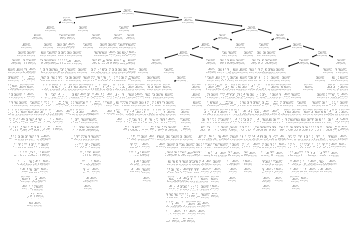

In [33]:
tree.plot_tree(model)
plt.show()

##tree measurement 

In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1339  454]
 [ 397 1371]]


precision, recall, F-measure and support

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1793
           1       0.75      0.78      0.76      1768

    accuracy                           0.76      3561
   macro avg       0.76      0.76      0.76      3561
weighted avg       0.76      0.76      0.76      3561



ROC Curve

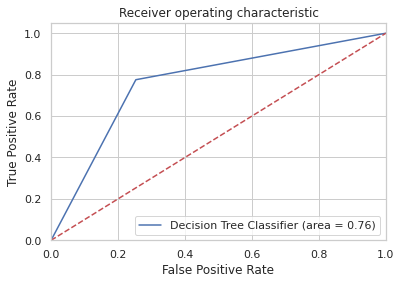

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

model_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

##feature_importances

In [37]:
loans_features = [x for i,x in enumerate(X.columns) if i!=len(X.columns)]

print("Feature importances:\n{}".format(model.feature_importances_))

Feature importances:
[0.11853427 0.12039313 0.0848274  0.06956046 0.07983715 0.05758952
 0.09813201 0.09314659 0.08105178 0.0547846  0.06860659 0.04084138
 0.03269512]


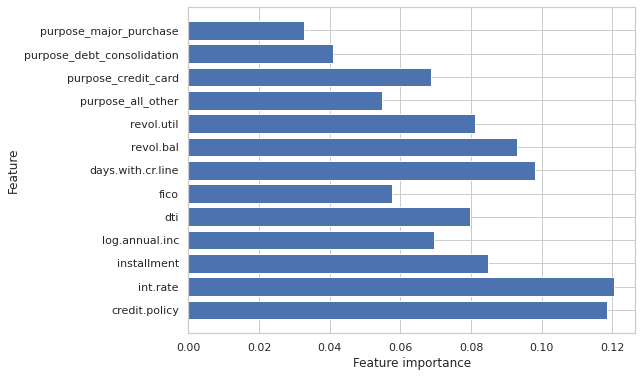

In [38]:
def plot_feature_importances_loans(model):
    plt.figure(figsize=(8,6))
    n_features = len(X.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), loans_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_loans(model)
plt.savefig('feature_importance')

- We got 2 feature most feature importance : credit.policy and int.rate
- next, we try to use only 2 feature and see how that they impove by same measurement 

##Impove 

In [39]:
X.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_major_purchase'],
      dtype='object')

keep only 2 high feature importance score

In [40]:
X2 = X[['credit.policy','int.rate']]

In [41]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.33, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [42]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("\033[1m Accuracy of Decision Tree Classifier on test set:","{:.2%}".format(accuracy_score(y_test, y_pred)))

 Accuracy of Decision Tree Classifier on test set: 84.22%


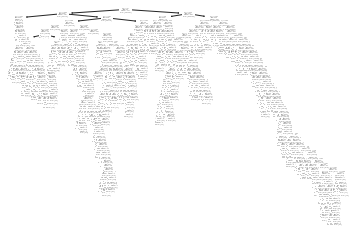

In [43]:
tree.plot_tree(model)
plt.show()

In [44]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1745   48]
 [ 514 1254]]


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      1793
           1       0.96      0.71      0.82      1768

    accuracy                           0.84      3561
   macro avg       0.87      0.84      0.84      3561
weighted avg       0.87      0.84      0.84      3561



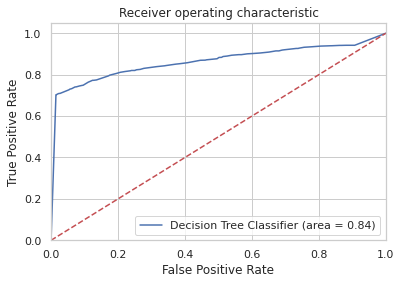

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

model_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

##Wow! it better in case of score
Accuracy increase from 76% to 84% and ROC grap prove it

finally, we learn classification step by step with simply data and DT classifier, in the real world the data may muc more complicate and we need more robus classifier to dealwith it. annway, understand basic is importance to grade up the model.   

------------------------------------------------------------------------------
have you enjoy,see youu!